In [119]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [120]:
professors = pd.read_csv('professors.csv')
ratings = pd.read_csv('ratings.csv')

In [121]:
professors.head()

,schoolid_s,total_number_of_ratings_i,pk_id,averageratingscore_rf,teacherfirstname_t,teacherlastname_t
0,45,127,11705,3.99,Faye,Navabi
1,45,121,18588,2.40,Yinong,Chen
2,45,94,387339,4.21,Mutsumi,Nakamura
3,45,92,1011373,3.74,Janaka,Balasooriya
4,45,86,238319,2.30,Charles,Colbourn


In [122]:
ratings.head()

,rErrorMsg,rWouldTakeAgain,rClass,rTextBookUse,easyColor,teacherGrade,rEasy,rClarity,usefulGrouping,rInterest,...,onlineClass,notHelpCount,rHelpful,teacher,helpColor,rEasyString,unUsefulGrouping,rOverall,helpCount,clarityColor
0,NaN,Yes,CSE205,No,average,A,2,5,people,NaN,...,NaN,0,5,NaN,good,2.0,people,5.0,0,good
1,NaN,NaN,CSE110,Yes,average,B,3,3,people,NaN,...,NaN,1,4,NaN,average,3.0,person,3.5,0,average
2,NaN,NaN,CSE110,Yes,average,A,2,4,person,NaN,...,NaN,2,4,NaN,good,2.0,people,4.0,1,good
3,NaN,NaN,CSE205,No,average,B,3,5,person,NaN,...,NaN,1,4,NaN,good,3.0,person,4.5,1,good
4,NaN,NaN,CSE110,Yes,poor,A,1,5,person,NaN,...,NaN,1,4,NaN,good,1.0,person,4.5,1,good


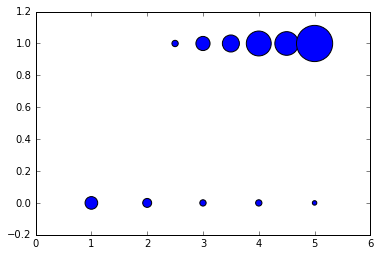

In [123]:
ratings['rWouldTakeAgainB'] = ratings['rWouldTakeAgain'].map({'Yes':1, 'No':0})
tempDf = ratings[['rWouldTakeAgainB', 'rOverall']].copy().dropna()
tempDf = tempDf.groupby( [ 'rOverall', 'rWouldTakeAgainB'] ).size().to_frame(name = 'count').reset_index()
plt.scatter(tempDf['rOverall'], tempDf['rWouldTakeAgainB'], s=tempDf['count']*10)

In [54]:
tempDf

,rOverall,rWouldTakeAgainB,count
0,1.0,0.0,16
1,2.0,0.0,8
2,2.5,1.0,4
3,3.0,0.0,4
4,3.0,1.0,20
5,3.5,1.0,29
6,4.0,0.0,4
7,4.0,1.0,62
8,4.5,1.0,56
9,5.0,0.0,2


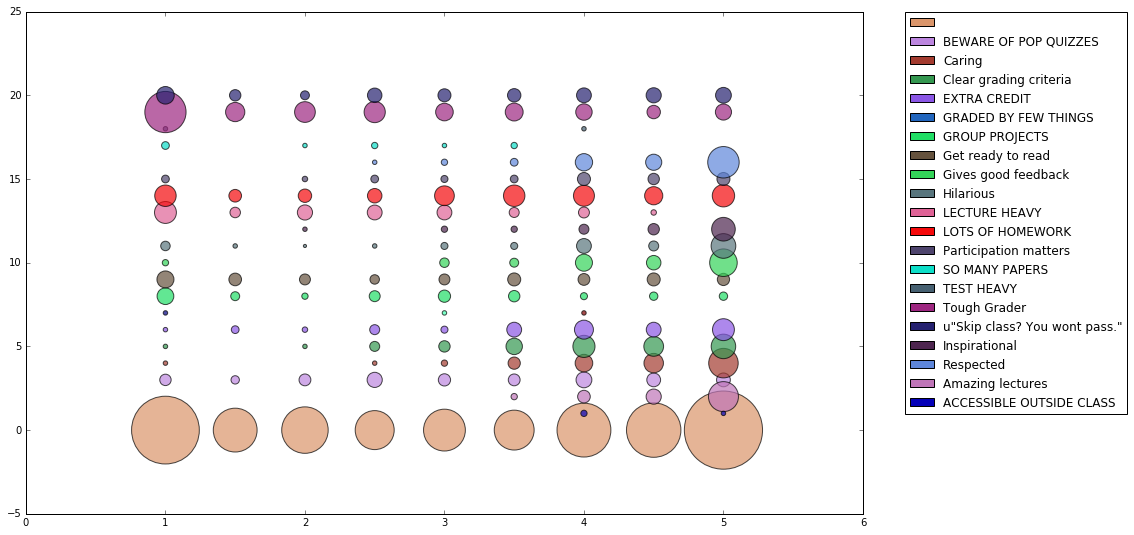

In [124]:
tags = ratings['teacherRatingTags'].copy().str.replace('[','').str.replace(']','').str.replace("u'",'').str.strip()\
.str.replace("'",'').str.split(',').apply(pd.Series, 1).stack()
tags.index = tags.index.droplevel(-1)
tags.name = 'Tags'
tempDf = ratings.join(tags)[['Tags', 'rOverall']]
tempDf['Tags'] = tempDf['Tags'].str.strip()
tempDf = tempDf.groupby( [ 'rOverall', 'Tags'] ).size().to_frame(name = 'count').reset_index()
tempDf['Numerical Tags'] = pd.Series(np.unique(tempDf['Tags'], return_inverse = True)[1])

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size
fig, ax = plt.subplots()
recs = []
classes = []
for i in tempDf['Numerical Tags'].unique():
    color = np.random.rand(3,1)
    ax.scatter(tempDf[tempDf['Numerical Tags'] == i]['rOverall'], tempDf[tempDf['Numerical Tags'] == i]['Numerical Tags'], \
               s=tempDf[tempDf['Numerical Tags'] == i]['count']*10, c=color, alpha=0.7)
    recs.append(mpatches.Rectangle((0,0),1,1,fc=color))
    classes.append(tempDf[tempDf['Numerical Tags'] == i]['Tags'].unique()[0])
ax.legend(recs, classes, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

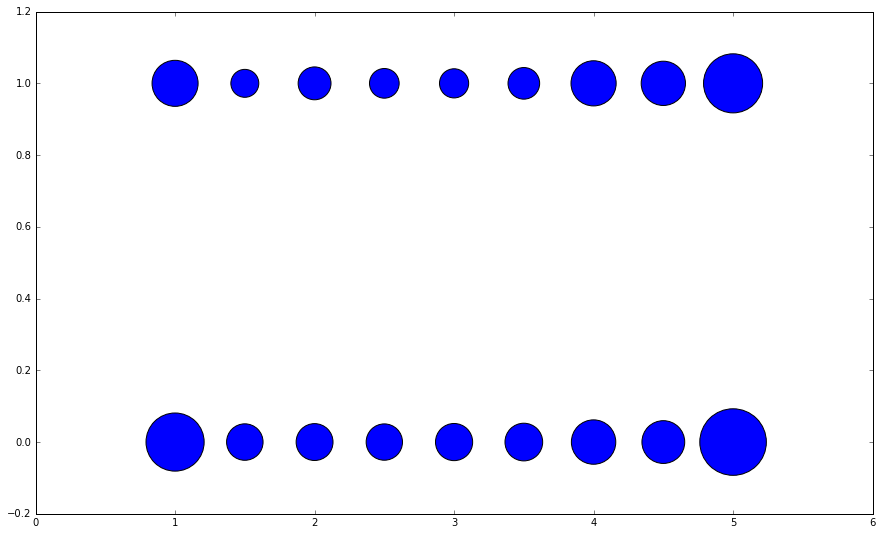

In [128]:
tempDf = ratings[['rOverall']].copy()
tempDf['rTextBookUseB'] = ratings['rTextBookUse'].map({'Yes':1, 'No':0})
tempDf = tempDf.dropna()
tempDf = tempDf.groupby( [ 'rOverall', 'rTextBookUseB'] ).size().to_frame(name = 'count').reset_index()
plt.scatter(tempDf['rOverall'], tempDf['rTextBookUseB'], s=tempDf['count']*10)

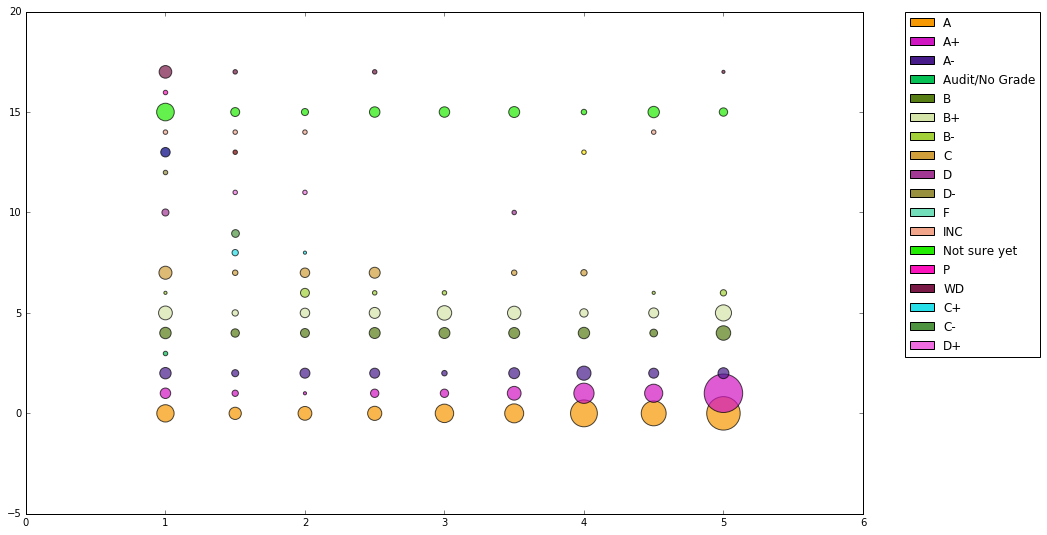

In [137]:
tempDf = ratings[['rOverall','teacherGrade']].copy().dropna()
tempDf = tempDf.groupby( [ 'rOverall', 'teacherGrade'] ).size().to_frame(name = 'count').reset_index()
tempDf['Numerical Grades'] = pd.Series(np.unique(tempDf['teacherGrade'], return_inverse = True)[1])

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size
fig, ax = plt.subplots()
recs = []
classes = []
for i in tempDf['Numerical Grades'].unique():
    color = np.random.rand(3,1)
    ax.scatter(tempDf[tempDf['Numerical Grades'] == i]['rOverall'], tempDf[tempDf['Numerical Grades'] == i]['Numerical Grades'], \
               s=tempDf[tempDf['Numerical Grades'] == i]['count']*10, c=color, alpha=0.7)
    recs.append(mpatches.Rectangle((0,0),1,1,fc=color))
    classes.append(tempDf[tempDf['Numerical Grades'] == i]['teacherGrade'].unique()[0])
ax.legend(recs, classes, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

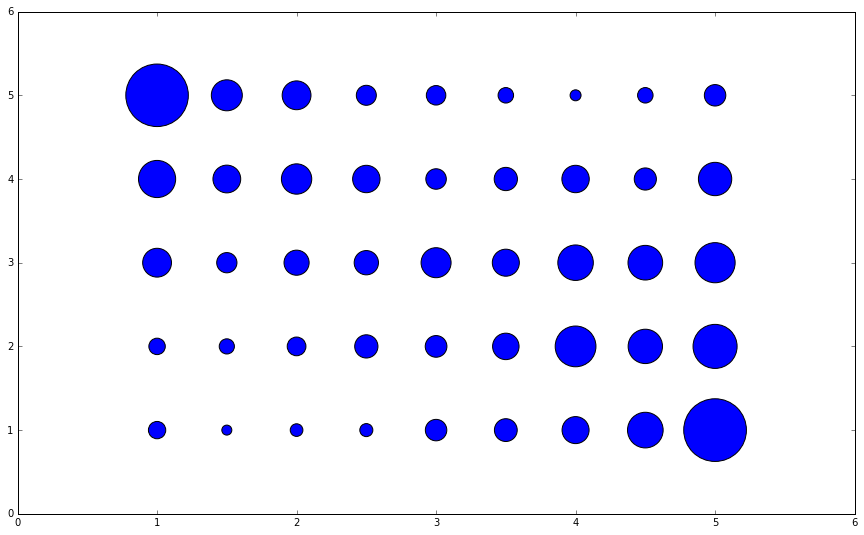

In [138]:
tempDf = ratings[['rOverall', 'rEasy']].copy()
tempDf = tempDf.dropna()
tempDf = tempDf.groupby( [ 'rOverall', 'rEasy'] ).size().to_frame(name = 'count').reset_index()
plt.scatter(tempDf['rOverall'], tempDf['rEasy'], s=tempDf['count']*10)